In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("C:/Users/shrey/OneDrive/Documents/US_Accidents_March23.csv",nrows=10000)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10000 non-null  object 
 1   Source                 10000 non-null  object 
 2   Severity               10000 non-null  int64  
 3   Start_Time             10000 non-null  object 
 4   End_Time               10000 non-null  object 
 5   Start_Lat              10000 non-null  float64
 6   Start_Lng              10000 non-null  float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           10000 non-null  float64
 10  Description            10000 non-null  object 
 11  Street                 10000 non-null  object 
 12  City                   10000 non-null  object 
 13  County                 10000 non-null  object 
 14  State                  10000 non-null  object 
 15  Zip

In [12]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], errors='coerce')


df.drop(columns=['End_Lat', 'End_Lng'], inplace=True)

df.dropna(subset=['Start_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition'], inplace=True)

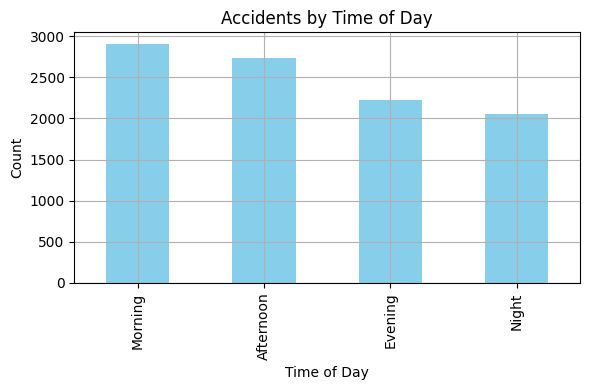

In [14]:
# Extract hour and map to period
df['Hour'] = df['Start_Time'].dt.hour

def get_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Hour'].apply(get_period)

# Bar plot: Accidents by time of day
plt.figure(figsize=(6,4))
df['Time_of_Day'].value_counts().loc[['Morning','Afternoon','Evening','Night']].plot(kind='bar', color='skyblue')
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


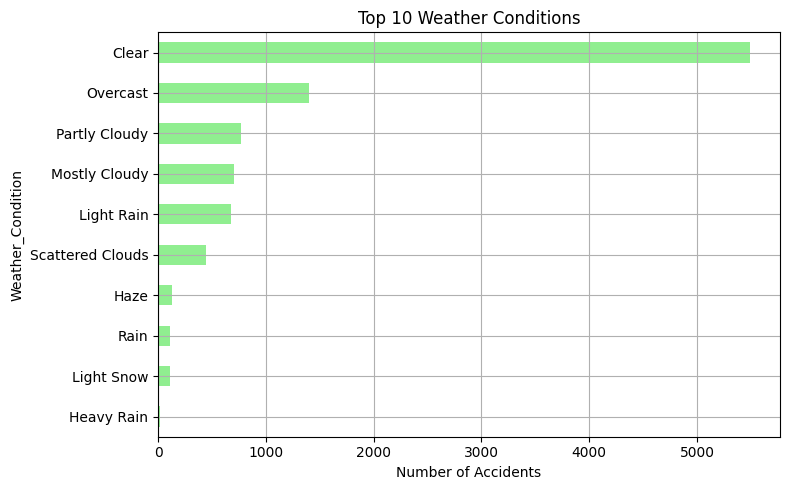

In [16]:
# Bar chart: Top 10 weather conditions
plt.figure(figsize=(8,5))
df['Weather_Condition'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Weather Conditions")
plt.xlabel("Number of Accidents")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


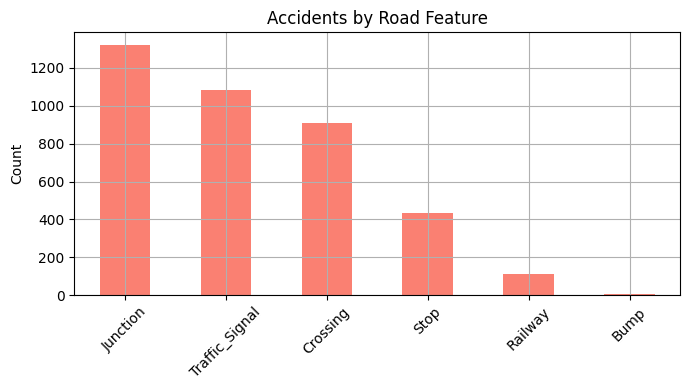

In [18]:
road_cols = ['Junction', 'Traffic_Signal', 'Railway', 'Stop', 'Bump', 'Crossing']

# Sum of accidents with each condition
road_counts = df[road_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
road_counts.plot(kind='bar', color='salmon')
plt.title("Accidents by Road Feature")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


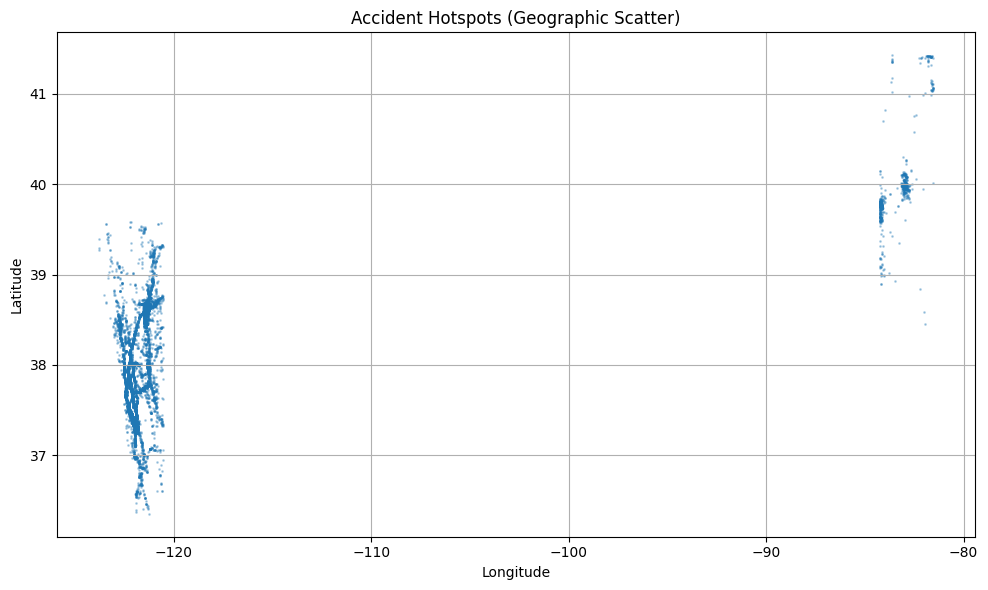

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df['Start_Lng'], df['Start_Lat'], s=1, alpha=0.3)
plt.title("Accident Hotspots (Geographic Scatter)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


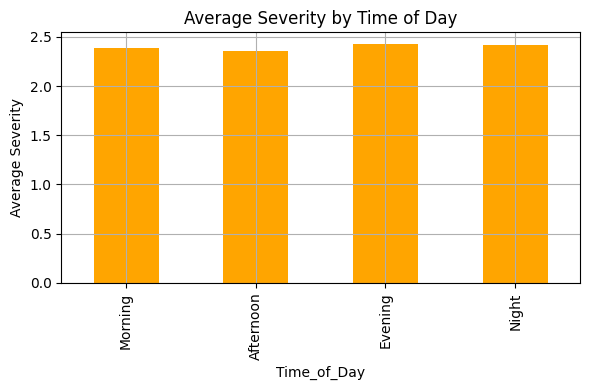

In [21]:
plt.figure(figsize=(6,4))
df.groupby('Time_of_Day')['Severity'].mean().loc[['Morning','Afternoon','Evening','Night']].plot(kind='bar', color='orange')
plt.title("Average Severity by Time of Day")
plt.ylabel("Average Severity")
plt.grid(True)
plt.tight_layout()
plt.show()
